**What's in a job and What's in a Resume... Research Question: What are the most common words on the preferred skills of entry level NYC government jobs?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/oshaf23/OpenDataSets/main/NYC_Jobs.csv')

In [3]:
df.head(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,496081,DEPT OF ENVIRONMENT PROTECTION,Internal,2,Stormwater Resiliency,ASSOCIATE PROJECT MANAGER,Competitive-1,22427,02,"Engineering, Architecture, & Planning",F,Experienced (non-manager),74650.0,109409.0,Annual,59-17 Junction Blvd Corona Ny,Green Infrastructure,**IMPORTANT NOTE: Only those serving as a perm...,Qualification Requirements One year of full-ti...,â¢\tNew York State Professional Engineering L...,"As of August 2, 2021, all new hires must be va...",To apply click Apply Now,35 Hours weekly,59-17 Junction Blvd Corona Ny,NaN,New York City Residency is not required for th...,10/28/2021,NaN,11/08/2021,01/18/2022
1,509078,CONSUMER AFFAIRS,Internal,1,Mediator and Intake Specialist,CLERICAL ASSOCIATE,Competitive-1,10251,04,Legal Affairs,F,Experienced (non-manager),40017.0,52242.0,Annual,"42 Broadway, N.Y.",General Counsel's Office,The NYC Department of Consumer and Worker Prot...,Qualification Requirements A four-year high s...,"â¢\tExcellent verbal, written and professiona...",NaN,For Non-City/External Candidates: Visit the Ex...,NaN,NaN,NaN,New York City residency is generally required ...,12/15/2021,13-FEB-2022,12/15/2021,01/18/2022
2,497603,OFF OF PAYROLL ADMINISTRATION,Internal,1,Business Analyst,COMPUTER SPECIALIST (SOFTWARE),Competitive-1,13632,03,"Policy, Research & Analysis",F,Experienced (non-manager),92194.0,110000.0,Annual,5 Manhattan West,Citywide Sys Business Analysis,The Financial Information Services Agency and ...,(1) A baccalaureate degree from an accredited ...,â¢\tDemonstrated ability to manage the requir...,#O-127,Current NYC employees may apply to Job ID: 497...,35 Hours Weekly/Day,5 Manhattan West,NaN,New York City Residency is not required for th...,10/29/2021,NaN,10/29/2021,01/18/2022


In [4]:
df.shape

(2955, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         2955 non-null   int64  
 1   Agency                         2955 non-null   object 
 2   Posting Type                   2955 non-null   object 
 3   # Of Positions                 2955 non-null   int64  
 4   Business Title                 2955 non-null   object 
 5   Civil Service Title            2955 non-null   object 
 6   Title Classification           2955 non-null   object 
 7   Title Code No                  2955 non-null   object 
 8   Level                          2955 non-null   object 
 9   Job Category                   2953 non-null   object 
 10  Full-Time/Part-Time indicator  2784 non-null   object 
 11  Career Level                   2953 non-null   object 
 12  Salary Range From              2955 non-null   f

In [6]:
df['Average_Salary'] = df[['Salary Range From','Salary Range To']].mean(axis=1) #create new column averaging salary range from and to

In [7]:
df['Career Level'].value_counts() 

Experienced (non-manager)    2147
Entry-Level                   372
Manager                       328
Executive                      67
Student                        39
Name: Career Level, dtype: int64

In [8]:
df2 = df[df['Career Level']=='Entry-Level'] #create new dataframe filtering only for entry level jobs

In [9]:
df2 = df2[['Job ID', 'Agency', 'Average_Salary','Career Level', 'Minimum Qual Requirements','Preferred Skills', 'Posting Date']]
df2.rename(columns={'Job ID':'Job_ID','Career Level':'Career_Level','Minimum Qual Requirements':'Min_Qual','Preferred Skills':'Pref_Skills','Posting Date':'Post_Date'},inplace=True) 
#rename columns removing spaces from columns (making it easier to do certain functions)

In [10]:
df2.dropna(inplace=True) #drop all rows with null values.

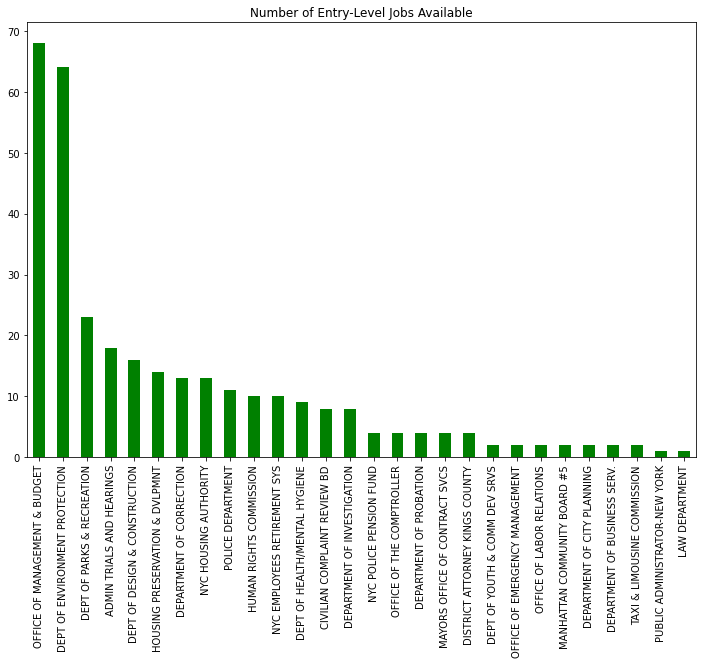

In [11]:
JobsAvailable = df2['Agency'].value_counts().plot(kind='bar',color='green',figsize=(12,8),title='Number of Entry-Level Jobs Available')

**Analyis: Created bar chart finding the most entry level jobs in each agency. As seen The Office of Management and Budget has the most jobs available**

In [13]:
df2.groupby(['Agency'])['Average_Salary'].mean()

Agency
ADMIN TRIALS AND HEARINGS         15704.865628
CIVILIAN COMPLAINT REVIEW BD      48290.375000
DEPARTMENT OF BUSINESS SERV.      74207.500000
DEPARTMENT OF CITY PLANNING       59348.500000
DEPARTMENT OF CORRECTION          50667.489031
DEPARTMENT OF INVESTIGATION       50667.375000
DEPARTMENT OF PROBATION           51063.500000
DEPT OF DESIGN & CONSTRUCTION     60767.437500
DEPT OF ENVIRONMENT PROTECTION    47895.949634
DEPT OF HEALTH/MENTAL HYGIENE     44641.555556
DEPT OF PARKS & RECREATION        15886.825326
DEPT OF YOUTH & COMM DEV SRVS        16.550000
DISTRICT ATTORNEY KINGS COUNTY    40740.500000
HOUSING PRESERVATION & DVLPMNT    51627.928571
HUMAN RIGHTS COMMISSION           48242.348560
LAW DEPARTMENT                    44377.000000
MANHATTAN COMMUNITY BOARD #5      51000.000000
MAYORS OFFICE OF CONTRACT SVCS    53750.000000
NYC EMPLOYEES RETIREMENT SYS      91828.400000
NYC HOUSING AUTHORITY             55332.192308
NYC POLICE PENSION FUND           45278.875000
OFFICE

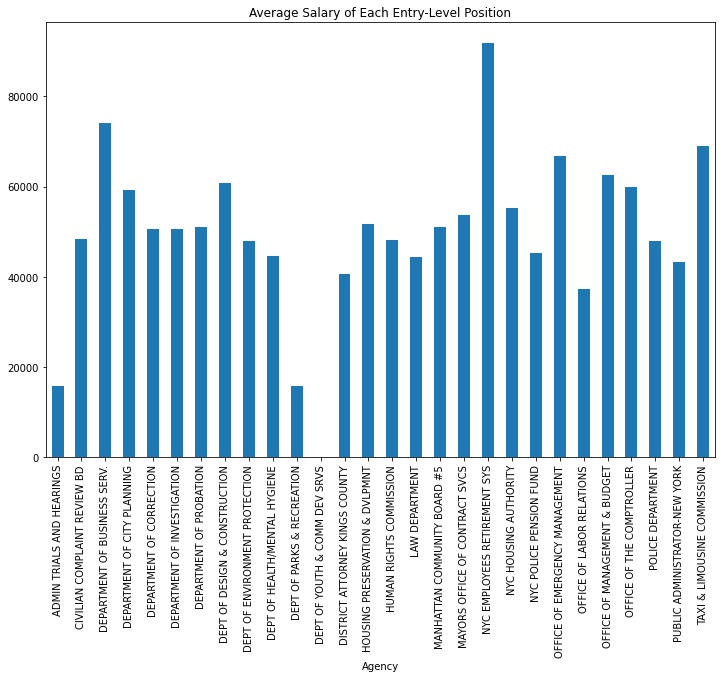

In [12]:
EntryLevelSalary = df2.groupby(['Agency'])['Average_Salary'].mean().plot(kind='bar',figsize=(12,8), title='Average Salary of Each Entry-Level Position')

**Analysis: Created Bar chart to find the highest salaries (by mean) for each agency. As seen the NYC Employees Retirement SYS has the highest average salary for their entry level jobs available.**

In [14]:
df3 = df2[df2['Agency'].str.contains('BUDGET')] #create new dataframe focusing only on the agency with most jobs available

In [15]:
df3['Pref_Skills'].head(5) #as seen the preferred skills column has many unneeded characters that must be cleaned

21     QUALIFICATIONS:  â¢\tExcellent oral and writt...
92     QUALIFICATIONS:  â¢\tStrong attention to deta...
93     QUALIFICATIONS:  â¢\tExceptional interpersona...
150    DESIRED SKILLS:  The duties of this position w...
162    DESIRED QUALIFICATIONS:  â¢\tExceptional orga...
Name: Pref_Skills, dtype: object

In [16]:
import re 

In [17]:
df3['Clean_Pref_Skills'] = df3['Pref_Skills'].str.replace('\W', ' ') #use replace to remove a majority of the unneeded characters. Though some are still left (as seen below)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df3.head(3)

,Job_ID,Agency,Average_Salary,Career_Level,Min_Qual,Pref_Skills,Post_Date,Clean_Pref_Skills
21,514174,OFFICE OF MANAGEMENT & BUDGET,58577.0,Entry-Level,1. A baccalaureate degree from an accredited c...,QUALIFICATIONS: â¢\tExcellent oral and writt...,01/11/2022,QUALIFICATIONS â Excellent oral and writte...
92,510662,OFFICE OF MANAGEMENT & BUDGET,62678.0,Entry-Level,1. A baccalaureate degree from an accredited c...,QUALIFICATIONS: â¢\tStrong attention to deta...,12/22/2021,QUALIFICATIONS â Strong attention to detai...
93,512432,OFFICE OF MANAGEMENT & BUDGET,74501.5,Entry-Level,1. A baccalaureate degree from an accredited c...,QUALIFICATIONS: â¢\tExceptional interpersona...,01/05/2022,QUALIFICATIONS â Exceptional interpersonal...


In [19]:
df3.Clean_Pref_Skills.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True) 
#use regex to remove the rest of the unneeded characters. Its very possible that I did not need the replace above but I don't want to test it.

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [20]:
df3.head(3)

,Job_ID,Agency,Average_Salary,Career_Level,Min_Qual,Pref_Skills,Post_Date,Clean_Pref_Skills
21,514174,OFFICE OF MANAGEMENT & BUDGET,58577.0,Entry-Level,1. A baccalaureate degree from an accredited c...,QUALIFICATIONS: â¢\tExcellent oral and writt...,01/11/2022,QUALIFICATIONS Excellent oral and written...
92,510662,OFFICE OF MANAGEMENT & BUDGET,62678.0,Entry-Level,1. A baccalaureate degree from an accredited c...,QUALIFICATIONS: â¢\tStrong attention to deta...,12/22/2021,QUALIFICATIONS Strong attention to detail...
93,512432,OFFICE OF MANAGEMENT & BUDGET,74501.5,Entry-Level,1. A baccalaureate degree from an accredited c...,QUALIFICATIONS: â¢\tExceptional interpersona...,01/05/2022,QUALIFICATIONS Exceptional interpersonal ...


In [21]:
List = ' '.join([i for i in df3['Clean_Pref_Skills']]).split() #Create a list of all words in the cleaned Preferred Skills column

In [22]:
stopwords = ['and','to','with','a','the','as','in','of','is','able','be','for','or','under','needed','Must','use','new']
for word in list(List):  
    if word in stopwords:
        List.remove(word)
#Remove all words that are superfluous (such as "to" and "as")

In [23]:
import collections

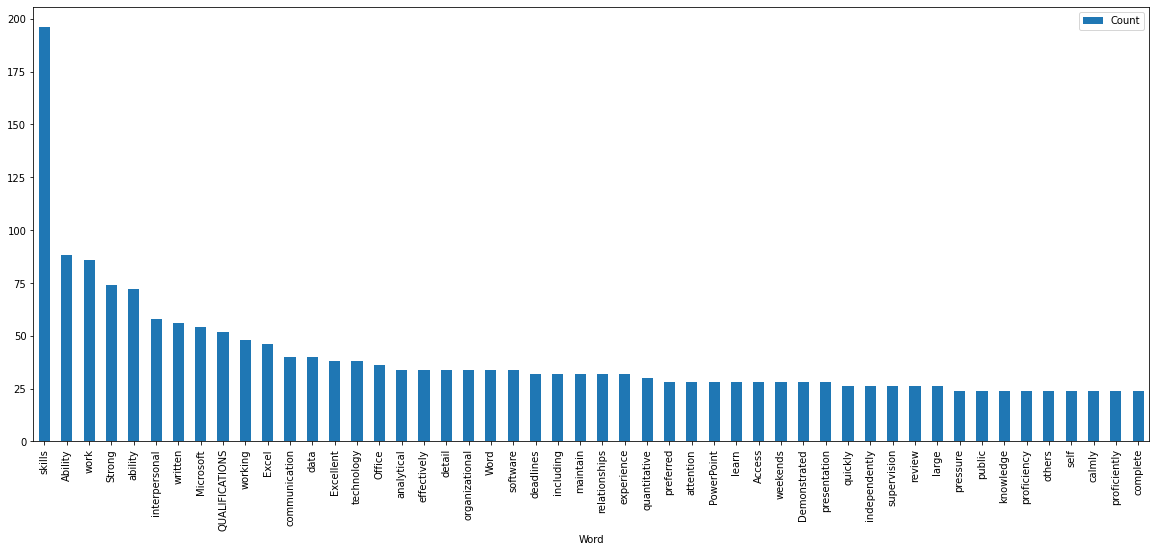

In [24]:
Count2 = collections.Counter(List) 
lst = Count2.most_common(50)
df5 = pd.DataFrame(lst, columns = ['Word', 'Count'])
df5.plot.bar(x='Word',y='Count',figsize=(20,8))
#create a plot of the most common words using the collections/counter library. 
                                               

**As seen the most common words include microsoft office softward (excel, Powerpoint, etc)**

In [25]:
from wordcloud import WordCloud

In [26]:
List = str(List) #ensure the list of words is all strings (which is required for the word cloud)

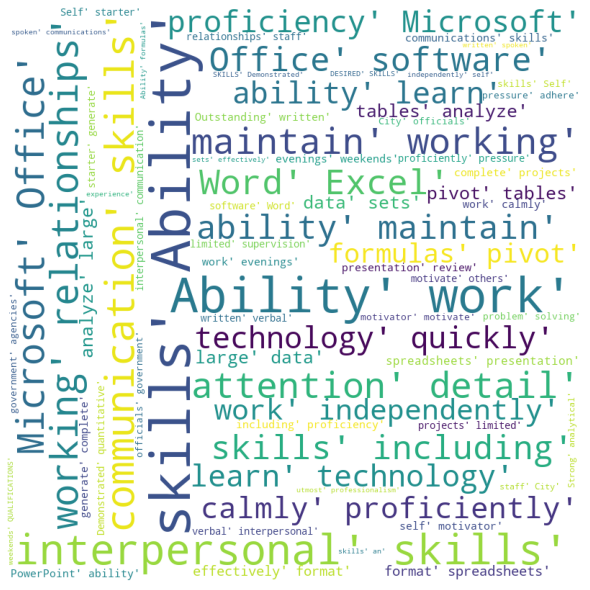

In [27]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(List)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**Word Cloud shows the same thing (but in a more interest visual way). Word and Excel are prominent in the center of Word Cloud**

In [28]:
df6 = df2[df2['Agency'].str.contains('RETIREMENT')] #Same process as above except now dataframe is focusing on agencies with the highest paying entry level job.

In [29]:
df6['Clean_Pref_Skills'] = df6['Pref_Skills'].str.replace('\W', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df6.Clean_Pref_Skills.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [31]:
df6.head(3)

,Job_ID,Agency,Average_Salary,Career_Level,Min_Qual,Pref_Skills,Post_Date,Clean_Pref_Skills
131,266542,NYC EMPLOYEES RETIREMENT SYS,102507.0,Entry-Level,1. A master's degree in computer science from ...,â¢ Prior experience with ETL process involvin...,10/06/2016,Prior experience with ETL process involving...
349,278063,NYC EMPLOYEES RETIREMENT SYS,85682.5,Entry-Level,(1) A baccalaureate degree from an accredited ...,"Valid holder of one of the following: SSCP, CI...",01/12/2017,Valid holder of one of the following SSCP CI...
840,420423,NYC EMPLOYEES RETIREMENT SYS,89100.5,Entry-Level,Professional/vendor certification(s) in local ...,â¢ Valid holder of one of the following: SSCP...,10/31/2019,Valid holder of one of the following SSCP ...


In [32]:
List2 = ' '.join([i for i in df6['Clean_Pref_Skills']]).split()

In [33]:
stopwords = ['and','to','with','a','the','as','in','of','is','able','be','for','or','under','needed','Must','use','new','on','have']
for word in list(List2):  # iterating on a copy since removing will mess things up
    if word in stopwords:
        List2.remove(word)

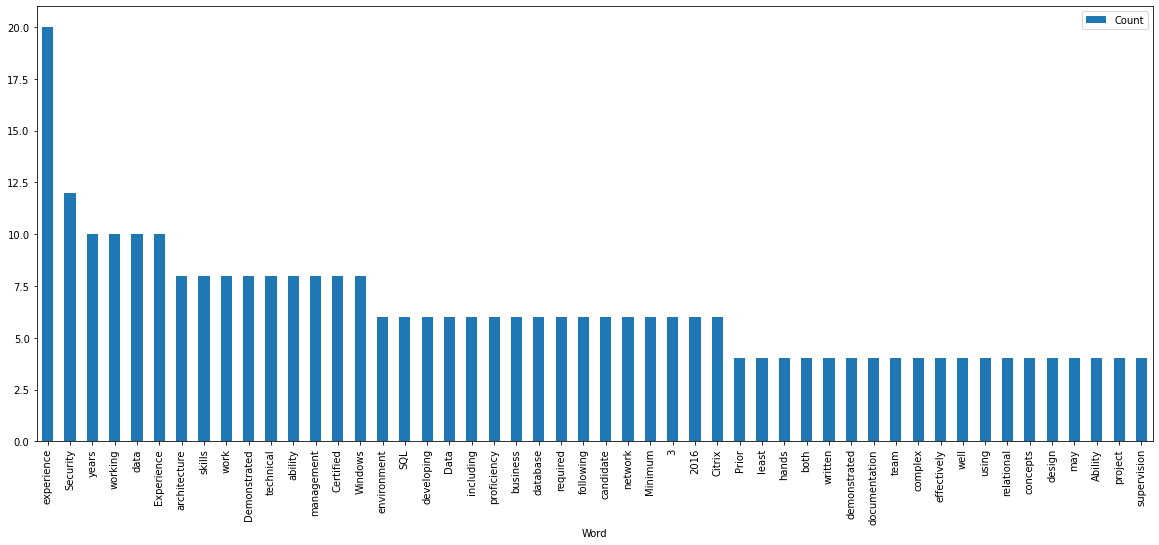

In [34]:
Count3 = collections.Counter(List2)
lst = Count3.most_common(50)
df5 = pd.DataFrame(lst, columns = ['Word', 'Count'])
df5.plot.bar(x='Word',y='Count',figsize=(20,8))

In [35]:
List2 = str(List2)

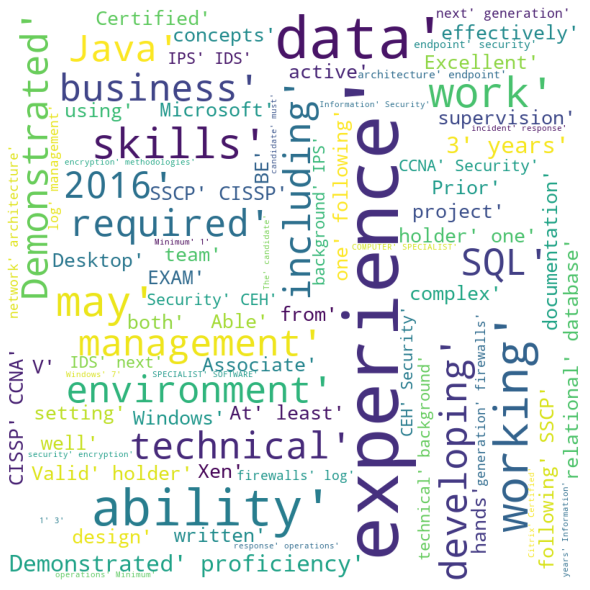

In [36]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(List2)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**As seen in the bar chart and word cloud, the highest paying jobs are much more data foward. The most common words include SQL and data, etc.**

# Conclusion

**Unsurprisingly the agency with the most entry level jobs available requires experience in Microsoft office. Surprisingly, the highest paying entry level jobs is much more data focused, requiring experience in SQL and Java. I may have to look into applying for this job!**